In [1]:
import sklearn
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)  # Disable line-wrapping
pd.set_option('display.max_rows', None)


coffea_caff = pd.read_csv(r"..\data\coll_caff_node_w_class.csv")
#coffea_caff_clim = pd.read_csv(r"..\data\coll_caff_node_clim_w_class.csv")
#coffea_caff_env = pd.read_csv(r"..\data\coll_caff_node_env_w_class.csv")

coffee_data = coffea_caff.copy()

#distinct_vals = coffee_data['caffeine_class'].value_counts()
#print(distinct_vals)

coffee_data.drop(columns=['specimen_id','longitude','latitude', 'source_crs', 'mada_geom_point', 'sampled_layers', 'nodata_layers', 'is_categorical_encoded'],inplace=True)

coffee_data.head

<bound method NDFrame.head of      clim_1_tmin1_Monthly minimum temperature - January (°C x 10)  clim_2_tmin2_Monthly minimum temperature - February (°C x 10)  clim_3_tmin3_Monthly minimum temperature - March (°C x 10)  clim_4_tmin4_Monthly minimum temperature - April (°C x 10)  clim_5_tmin5_Monthly minimum temperature - May (°C x 10)  clim_6_tmin6_Monthly minimum temperature - June (°C x 10)  clim_7_tmin7_Monthly minimum temperature - July (°C x 10)  clim_8_tmin8_Monthly minimum temperature - August (°C x 10)  clim_9_tmin9_Monthly minimum temperature - September (°C x 10)  clim_10_tmin10_Monthly minimum temperature - October (°C x 10)  ...  env_78_wat_Watersheds_RetDisp_Mananara_du_Sud  env_78_wat_Watersheds_RetDisp_Mandrare  env_78_wat_Watersheds_RetDisp_Mangoky  env_78_wat_Watersheds_RetDisp_Mangoro  env_78_wat_Watersheds_RetDisp_Onilahy  env_78_wat_Watersheds_RetDisp_Sambirano  env_78_wat_Watersheds_RetDisp_Tsiribihina  env_78_wat_Watersheds__nodata  caffeine_percent  caffeine_clas

Renaming headers

In [2]:

coffee_data.columns = (coffee_data.columns
              .str.replace(r'[^\w\s]', '', regex=True)  # Remove special characters like °, parentheses, hyphen
              .str.replace(r'\s+', '_', regex=True)     # Replace spaces with underscores
              .str.strip())                             # Strip leading and trailing spaces


mapping_df = pd.read_csv(r'../data/column_mapping.csv')

mapping_df['old_name'] = (mapping_df['old_name']
                          .str.replace(r'[^\w\s]', '', regex=True)  # Clean the old names similarly
                          .str.replace(r'\s+', '_', regex=True)     # Replace spaces with underscores
                          .str.strip())
mapping_df

# Create the mapping dictionary
mapping_dict = dict(zip(mapping_df['old_name'], mapping_df['new_name']))

# Rename columns in the DataFrame using the cleaned mapping
coffee_data.rename(columns=mapping_dict, inplace=True)
coffee_data.columns

Index(['clim_1_tmin1_jan', 'clim_2_tmin2_feb', 'clim_3_tmin3_mar', 'clim_4_tmin4_apr', 'clim_5_tmin5_may', 'clim_6_tmin6_jun', 'clim_7_tmin7_jul', 'clim_8_tmin8_aug', 'clim_9_tmin9_sep', 'clim_10_tmin10_oct',
       ...
       'env_78_wat_17', 'env_78_wat_1', 'env_78_wat_18', 'env_78_wat_15', 'env_78_wat_19', 'env_78_wat_24', 'env_78_wat_21', 'env_78_wat_0', 'caffeine_percent', 'caffeine_class'], dtype='object', length=160)

In [45]:
clim_columns = list(coffee_data.filter(like='clim_').columns) + [ 'env_71_alt', 'env_72_slo', 'env_73_asp', 'env_74_solrad', 'env_79_forcov' ]

clim_data = coffee_data[clim_columns]

env_data = coffee_data.drop(columns=clim_columns+['caffeine_percent', 'caffeine_class'])

# Optional: View the column names for confirmation
print("Clim Data Numerical Features:")
print(clim_data.columns)

print("\nEnv Data Categorical Features:")
print(env_data.columns)


Clim Data Numerical Features:
Index(['clim_1_tmin1_jan', 'clim_2_tmin2_feb', 'clim_3_tmin3_mar', 'clim_4_tmin4_apr', 'clim_5_tmin5_may', 'clim_6_tmin6_jun', 'clim_7_tmin7_jul', 'clim_8_tmin8_aug', 'clim_9_tmin9_sep', 'clim_10_tmin10_oct', 'clim_11_tmin11_nov', 'clim_12_tmin12_dec', 'clim_13_tmax1_jan', 'clim_14_tmax2_feb', 'clim_15_tmax3_mar', 'clim_16_tmax4_apr', 'clim_17_tmax5_may', 'clim_18_tmax6_jun', 'clim_19_tmax7_jul', 'clim_20_tmax8_aug', 'clim_21_tmax9_sep', 'clim_22_tmax10_oct', 'clim_23_tmax11_nov', 'clim_24_tmax12_dec', 'clim_25_prec1_jan', 'clim_26_prec2_feb', 'clim_27_prec3_mar', 'clim_28_prec4_apr', 'clim_29_prec5_may', 'clim_30_prec6_jun', 'clim_31_prec7_jul', 'clim_32_prec8_aug', 'clim_33_prec9_sep', 'clim_34_prec10_oct', 'clim_35_prec11_nov', 'clim_36_prec12_dec', 'clim_37_ann_mean_temp', 'clim_38_mean_diurn_range', 'clim_39_isotherm', 'clim_40_temp_season', 'clim_41_tmax_warmest_m', 'clim_42_tmin_coldest_m', 'clim_43_tannual_range', 'clim_44_tmean_wettest_q', 'clim_4

Managing NaN values

In [44]:
missing_data = clim_data.isnull().sum()
missing_data

clim_1_tmin1_jan            11
clim_2_tmin2_feb            11
clim_3_tmin3_mar            11
clim_4_tmin4_apr            11
clim_5_tmin5_may            11
clim_6_tmin6_jun            11
clim_7_tmin7_jul            11
clim_8_tmin8_aug            11
clim_9_tmin9_sep            11
clim_10_tmin10_oct          11
clim_11_tmin11_nov          11
clim_12_tmin12_dec          11
clim_13_tmax1_jan           11
clim_14_tmax2_feb           11
clim_15_tmax3_mar           11
clim_16_tmax4_apr           11
clim_17_tmax5_may           11
clim_18_tmax6_jun           11
clim_19_tmax7_jul           11
clim_20_tmax8_aug           11
clim_21_tmax9_sep           11
clim_22_tmax10_oct          11
clim_23_tmax11_nov          11
clim_24_tmax12_dec          11
clim_25_prec1_jan           11
clim_26_prec2_feb           11
clim_27_prec3_mar           11
clim_28_prec4_apr           11
clim_29_prec5_may           11
clim_30_prec6_jun           11
clim_31_prec7_jul           11
clim_32_prec8_aug           11
clim_33_

We have decided to insert median value in place of NaN instead of removing row

In [46]:
clim_data_filled = clim_data.fillna(clim_data.median()) # Potentially remove rows containing NaN values
missing_data = clim_data_filled.isnull().sum()
missing_data

clim_1_tmin1_jan            0
clim_2_tmin2_feb            0
clim_3_tmin3_mar            0
clim_4_tmin4_apr            0
clim_5_tmin5_may            0
clim_6_tmin6_jun            0
clim_7_tmin7_jul            0
clim_8_tmin8_aug            0
clim_9_tmin9_sep            0
clim_10_tmin10_oct          0
clim_11_tmin11_nov          0
clim_12_tmin12_dec          0
clim_13_tmax1_jan           0
clim_14_tmax2_feb           0
clim_15_tmax3_mar           0
clim_16_tmax4_apr           0
clim_17_tmax5_may           0
clim_18_tmax6_jun           0
clim_19_tmax7_jul           0
clim_20_tmax8_aug           0
clim_21_tmax9_sep           0
clim_22_tmax10_oct          0
clim_23_tmax11_nov          0
clim_24_tmax12_dec          0
clim_25_prec1_jan           0
clim_26_prec2_feb           0
clim_27_prec3_mar           0
clim_28_prec4_apr           0
clim_29_prec5_may           0
clim_30_prec6_jun           0
clim_31_prec7_jul           0
clim_32_prec8_aug           0
clim_33_prec9_sep           0
clim_34_pr

In [47]:
# Identify constant columns (where min == max for each column)
constant_columns = [col for col in clim_data.columns if clim_data[col].nunique() == 1]

# Print the constant columns
print(f"Constant columns: {constant_columns}")


Constant columns: []


In [48]:
missing_data = env_data.isnull().sum()
missing_data

env_75_geo_1_1    0
env_75_geo_10     0
env_75_geo_9      0
env_75_geo_4      0
env_75_geo_13     0
env_75_geo_7      0
env_75_geo_12     0
env_75_geo_6      0
env_75_geo_5      0
env_75_geo_11     0
env_75_geo_2      0
env_75_geo_0      0
env_76_soi_5      0
env_76_soi_9      0
env_76_soi_1      0
env_76_soi_7      0
env_76_soi_23     0
env_76_soi_18     0
env_76_soi_20     0
env_76_soi_11     0
env_76_soi_19     0
env_76_soi_10     0
env_76_soi_3      0
env_76_soi_2      0
env_76_soi_15     0
env_76_soi_12     0
env_76_soi_22     0
env_76_soi_21     0
env_76_soi_6      0
env_76_soi_16     0
env_76_soi_17     0
env_76_soi_8      0
env_76_soi_4      0
env_76_soi_14     0
env_76_soi_13     0
env_76_soi_0      0
env_77_veg_1      0
env_77_veg_2      0
env_77_veg_3      0
env_77_veg_4      0
env_77_veg_5      0
env_77_veg_6      0
env_77_veg_7      0
env_77_veg_9      0
env_77_veg_10     0
env_77_veg_11     0
env_77_veg_12     0
env_77_veg_13     0
env_77_veg_14     0
env_77_veg_15     0


In [49]:
print(env_data)

     env_75_geo_1_1  env_75_geo_10  env_75_geo_9  env_75_geo_4  env_75_geo_13  env_75_geo_7  env_75_geo_12  env_75_geo_6  env_75_geo_5  env_75_geo_11  ...  env_78_wat_25  env_78_wat_16  env_78_wat_17  env_78_wat_1  env_78_wat_18  env_78_wat_15  env_78_wat_19  env_78_wat_24  env_78_wat_21  env_78_wat_0
0                 0              0             0             0              0             0              0             0             1              0  ...              0              0              0             0              0              0              0              0              0             0
1                 0              1             0             0              0             0              0             0             0              0  ...              0              0              0             0              0              0              0              0              0             0
2                 0              1             0             0              0             0

In [51]:
print(env_data.dtypes)


env_75_geo_1_1    int64
env_75_geo_10     int64
env_75_geo_9      int64
env_75_geo_4      int64
env_75_geo_13     int64
env_75_geo_7      int64
env_75_geo_12     int64
env_75_geo_6      int64
env_75_geo_5      int64
env_75_geo_11     int64
env_75_geo_2      int64
env_75_geo_0      int64
env_76_soi_5      int64
env_76_soi_9      int64
env_76_soi_1      int64
env_76_soi_7      int64
env_76_soi_23     int64
env_76_soi_18     int64
env_76_soi_20     int64
env_76_soi_11     int64
env_76_soi_19     int64
env_76_soi_10     int64
env_76_soi_3      int64
env_76_soi_2      int64
env_76_soi_15     int64
env_76_soi_12     int64
env_76_soi_22     int64
env_76_soi_21     int64
env_76_soi_6      int64
env_76_soi_16     int64
env_76_soi_17     int64
env_76_soi_8      int64
env_76_soi_4      int64
env_76_soi_14     int64
env_76_soi_13     int64
env_76_soi_0      int64
env_77_veg_1      int64
env_77_veg_2      int64
env_77_veg_3      int64
env_77_veg_4      int64
env_77_veg_5      int64
env_77_veg_6    

In [62]:
# Check the data types of each column
print(env_data.dtypes)

# Identify columns that are of type 'object'
object_columns = env_data.select_dtypes(include='object').columns

# Print the columns that are of type 'object'
print(f"Columns with object dtype: {object_columns}")


env_75_geo_1_1    int64
env_75_geo_10     int64
env_75_geo_9      int64
env_75_geo_4      int64
env_75_geo_13     int64
env_75_geo_7      int64
env_75_geo_12     int64
env_75_geo_6      int64
env_75_geo_5      int64
env_75_geo_11     int64
env_75_geo_2      int64
env_75_geo_0      int64
env_76_soi_5      int64
env_76_soi_9      int64
env_76_soi_1      int64
env_76_soi_7      int64
env_76_soi_23     int64
env_76_soi_18     int64
env_76_soi_20     int64
env_76_soi_11     int64
env_76_soi_19     int64
env_76_soi_10     int64
env_76_soi_3      int64
env_76_soi_2      int64
env_76_soi_15     int64
env_76_soi_12     int64
env_76_soi_22     int64
env_76_soi_21     int64
env_76_soi_6      int64
env_76_soi_16     int64
env_76_soi_17     int64
env_76_soi_8      int64
env_76_soi_4      int64
env_76_soi_14     int64
env_76_soi_13     int64
env_76_soi_0      int64
env_77_veg_1      int64
env_77_veg_2      int64
env_77_veg_3      int64
env_77_veg_4      int64
env_77_veg_5      int64
env_77_veg_6    

In [56]:
# Apply a lambda function to each column to check if the column is constant (i.e., all values are the same)
constant_columns = env_data.apply(lambda col: col.nunique() == 1, axis=0)

# Filter out the column names that are constant
constant_columns_list = constant_columns[constant_columns].index.tolist()
count = len(constant_columns_list)
# Print the constant columns
print(f"Constant columns: {count}")

num_columns = env_data.shape[1]

# Print the number of columns
print(f"Number of columns in the DataFrame: {num_columns}")



Constant columns: 20
Number of columns in the DataFrame: 83


In [69]:
for col in env_data.columns:
    print(f"{col}: {env_data[col].sum()}")

env_75_geo_1_1: 18
env_75_geo_10: 212
env_75_geo_9: 100
env_75_geo_4: 0
env_75_geo_13: 0
env_75_geo_7: 59
env_75_geo_12: 0
env_75_geo_6: 63
env_75_geo_5: 8
env_75_geo_11: 4
env_75_geo_2: 31
env_75_geo_0: 31
env_76_soi_5: 0
env_76_soi_9: 48
env_76_soi_1: 0
env_76_soi_7: 6
env_76_soi_23: 19
env_76_soi_18: 56
env_76_soi_20: 26
env_76_soi_11: 73
env_76_soi_19: 17
env_76_soi_10: 58
env_76_soi_3: 6
env_76_soi_2: 0
env_76_soi_15: 11
env_76_soi_12: 11
env_76_soi_22: 12
env_76_soi_21: 45
env_76_soi_6: 46
env_76_soi_16: 28
env_76_soi_17: 5
env_76_soi_8: 25
env_76_soi_4: 7
env_76_soi_14: 0
env_76_soi_13: 0
env_76_soi_0: 27
env_77_veg_1: 2
env_77_veg_2: 1
env_77_veg_3: 1
env_77_veg_4: 15
env_77_veg_5: 63
env_77_veg_6: 65
env_77_veg_7: 61
env_77_veg_9: 4
env_77_veg_10: 0
env_77_veg_11: 2
env_77_veg_12: 15
env_77_veg_13: 1
env_77_veg_14: 96
env_77_veg_15: 22
env_77_veg_16: 150
env_77_veg_18: 0
env_77_veg_19: 0
env_77_veg_22: 11
env_77_veg_23: 0
env_77_veg_25: 17
env_77_veg_0: 0
env_78_wat_9: 1
env_7

In [70]:
print(f"Shape of env_data: {env_data.shape}")

columns_to_remove = env_data.apply(lambda col: col.eq(0).all(), axis=0)

# Filter out the columns that are all 0
columns_to_remove = columns_to_remove[columns_to_remove].index.tolist()

# Print the columns that have all values as 0
print(f"Columns with all 0s: {columns_to_remove}")

Shape of env_data: (526, 83)
Columns with all 0s: ['env_75_geo_4', 'env_75_geo_13', 'env_75_geo_12', 'env_76_soi_5', 'env_76_soi_1', 'env_76_soi_2', 'env_76_soi_14', 'env_76_soi_13', 'env_77_veg_10', 'env_77_veg_18', 'env_77_veg_19', 'env_77_veg_23', 'env_77_veg_0', 'env_78_wat_7', 'env_78_wat_23', 'env_78_wat_25', 'env_78_wat_16', 'env_78_wat_19', 'env_78_wat_24', 'env_78_wat_21']


In [71]:

# Remove these columns from the DataFrame
env_data_clean = env_data.drop(columns=columns_to_remove)

# Print the columns that were removed
print(f"Removed columns: {columns_to_remove}")

# Check the shape of the DataFrame after removing the columns
print(f"Shape of env_data_clean: {env_data_clean.shape}")


Removed columns: ['env_75_geo_4', 'env_75_geo_13', 'env_75_geo_12', 'env_76_soi_5', 'env_76_soi_1', 'env_76_soi_2', 'env_76_soi_14', 'env_76_soi_13', 'env_77_veg_10', 'env_77_veg_18', 'env_77_veg_19', 'env_77_veg_23', 'env_77_veg_0', 'env_78_wat_7', 'env_78_wat_23', 'env_78_wat_25', 'env_78_wat_16', 'env_78_wat_19', 'env_78_wat_24', 'env_78_wat_21']
Shape of env_data_clean: (526, 63)


Now that all the NaN and constant columns have been managed or removed We are looking into the outliers using env_data_clean and clim_data_clean: 

Correlation matrix before removing outliers:


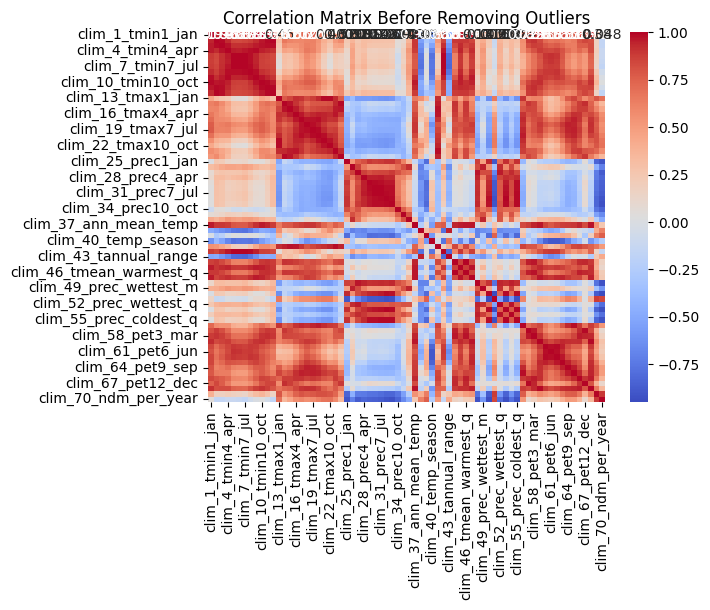

Correlation matrix after removing outliers:


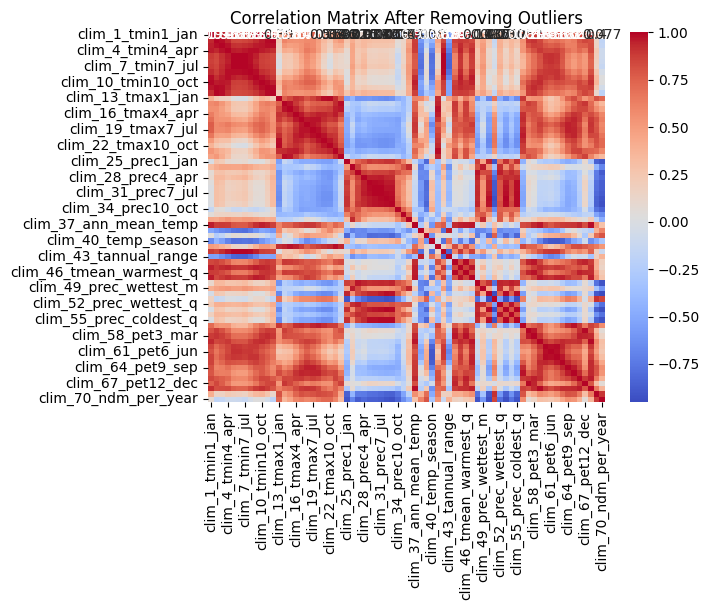

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Step 1: Check correlations before removing outliers
print("Correlation matrix before removing outliers:")
corr_before = clim_data_filled.corr()
sns.heatmap(corr_before, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Before Removing Outliers")
plt.show()

# Step 2: Remove outliers using Z-scores (for illustration, you can use other methods)
z_scores = np.abs(stats.zscore(clim_data_filled))
clim_data_clean = clim_data_filled[(z_scores < 3).all(axis=1)]

# Step 3: Check correlations after removing outliers
print("Correlation matrix after removing outliers:")
corr_after = clim_data_clean.corr()
sns.heatmap(corr_after, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix After Removing Outliers")
plt.show()

# Step 4: Compare the two correlation matrices and see the effect of outliers


In [27]:
# Calculate z-scores for numeric columns in clim_data
z_scores = np.abs(stats.zscore(clim_data_filled.select_dtypes(include=['float64', 'int64'])))

# Inspect z-scores to see if they are unusually large
print(z_scores)


     clim_1_tmin1_jan  clim_2_tmin2_feb  clim_3_tmin3_mar  clim_4_tmin4_apr  clim_5_tmin5_may  clim_6_tmin6_jun  clim_7_tmin7_jul  clim_8_tmin8_aug  clim_9_tmin9_sep  clim_10_tmin10_oct  ...  clim_61_pet6_jun  clim_62_pet7_jul  clim_63_pet8_aug  clim_64_pet9_sep  clim_65_pet10_oct  clim_66_pet11_nov  clim_67_pet12_dec  clim_68_pet_annual  clim_69_cwd_annual  clim_70_ndm_per_year
0            0.934721          0.753944          1.100328          1.528902          1.371846          1.267505          1.453629          1.417289          1.166105            0.713214  ...          0.975608          1.012500          0.801406          0.401438           0.127841           0.207601           0.173286            0.515009            0.948157              1.625267
1            0.164757          0.251952          0.352901          0.529223          0.667680          0.667262          0.624477          0.529171          0.323745            0.115318  ...          0.569726          0.452448          

In [29]:
z_scores = np.abs(stats.zscore(clim_data_filled))

# Step 3: Remove rows that contain outliers (based on z-score threshold, e.g., 3)
clim_data_clean = clim_data_filled[(z_scores < 3).all(axis=1)]

# Step 4: Check the shape of the data before and after outlier removal
print(f"Original data shape: {clim_data.shape}")
print(f"Cleaned data shape (after removing outliers): {clim_data_clean.shape}")

Original data shape: (526, 70)
Cleaned data shape (after removing outliers): (498, 70)


In [30]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = clim_data_filled.quantile(0.25)
Q3 = clim_data_filled.quantile(0.75)

# Calculate the IQR for each column
IQR = Q3 - Q1

# Remove rows where values are outside 1.5 * IQR for any column
clim_data_clean = clim_data_filled[~((clim_data_filled < (Q1 - 1.5 * IQR)) | (clim_data_filled > (Q3 + 1.5 * IQR))).any(axis=1)]

# Check the shape of the data after removing outliers
print(f"Original data shape: {clim_data_filled.shape}")
print(f"Data shape after removing outliers with IQR: {clim_data_clean.shape}")


Original data shape: (526, 70)
Data shape after removing outliers with IQR: (343, 70)


In [10]:
#clim_cleaned_data = clim_data.dropna()
#missing_data = clim_cleaned_data.isnull().sum()
#missing_data
#print("orig clim_data:", clim_data.shape)
#print("cleaned clim_data:", clim_cleaned_data.shape)

orig clim_data: (526, 70)
cleaned clim_data: (515, 70)


In [9]:
missing_data = env_data.isnull().sum()
missing_data

env_71_alt        17
env_72_slo        18
env_73_asp        18
env_74_solrad     18
env_79_forcov     17
env_75_geo_1_1     0
env_75_geo_10      0
env_75_geo_9       0
env_75_geo_4       0
env_75_geo_13      0
env_75_geo_7       0
env_75_geo_12      0
env_75_geo_6       0
env_75_geo_5       0
env_75_geo_11      0
env_75_geo_2       0
env_75_geo_0       0
env_76_soi_5       0
env_76_soi_9       0
env_76_soi_1       0
env_76_soi_7       0
env_76_soi_23      0
env_76_soi_18      0
env_76_soi_20      0
env_76_soi_11      0
env_76_soi_19      0
env_76_soi_10      0
env_76_soi_3       0
env_76_soi_2       0
env_76_soi_15      0
env_76_soi_12      0
env_76_soi_22      0
env_76_soi_21      0
env_76_soi_6       0
env_76_soi_16      0
env_76_soi_17      0
env_76_soi_8       0
env_76_soi_4       0
env_76_soi_14      0
env_76_soi_13      0
env_76_soi_0       0
env_77_veg_1       0
env_77_veg_2       0
env_77_veg_3       0
env_77_veg_4       0
env_77_veg_5       0
env_77_veg_6       0
env_77_veg_7 

Exploring and Managing outliers
